In [1]:

import IPython
from IPython.display import display, Image
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import IPython

import matplotlib.pyplot as plt
#%matplotlib inline

import networkx as nx
import pickle
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
#from Tkinter import Canvas
from IPython.display import display, Image

import os
original_dir = os.getcwd()
import pickle

## Introduction 

* We created a generic network visualization pipeline that will aid brain network model development and as a proof of concept applied it to a model of the hippocampus that we especially created as a proof of concept.

* Over the past few months we have learned about data analysis, a different but complementary  concept is biophysical neuronal modelling. Digital simulation of specific brain networks, can help us to understand neuronal algorithms, leading to robots that perform human-like spatial navigation and maze solving. 

* As well as improving AI, understanding brain network function could help researchers understand excito-toxicity and axonal retraction in diseases like Alzheimer's disease and epilepsy.

* Previously to replicate cortical neuronal networks, researchers have used something called "small-world" network.


* relevant to epilpsy. The ca3 subfield of the hippocampus is the source of a very regular and periodic theta rhythym, that can under pathological circumstances dominate the firing pattern of the entire brain.


* A micro-circuit is only one of [10s-100s] of thousands parallel microcircuits which share the same stereo typed wiring pattern.

* The hippocampus is a convenient target of modelling work as a lot of data has accumulated over a long history recording electro physiological and cell staining history
* understood early on link on encoding of new episodic memories, spatial memories and emotions.


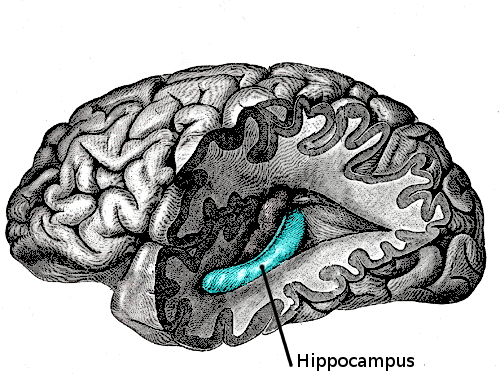

In [2]:
IPython.display.Image("protected_external/Gray739-emphasizing-hippocampus.png")


In [3]:

m = pickle.load(open("bool_matrix.p", "rb"))
exc = pickle.load(open("graph_excit.p", "rb"))
inh = pickle.load(open("graph_inhib.p", "rb"))
ms = exc + inh

In [4]:

sns.set(color_codes=True)
original_dir = os.getcwd()

assert np.sum(inh) > np.sum(exc)
G = nx.DiGraph(exc)
Gi = nx.DiGraph(inh)
in_degree = G.in_degree()
top_in = sorted(([ (v,k) for k, v in in_degree.items() ]))
in_hub = top_in[-1][1]
out_degree = G.out_degree()
top_out = sorted(([ (v,k) for k, v in out_degree.items() ]))
out_hub = top_out[-1][1]
mean_out = np.mean(list(out_degree.values()))
mean_in = np.mean(list(in_degree.values()))

mean_conns = int(mean_in + mean_out/2)

k = 2 # number of neighbouig nodes to wire.
p = 0.25 # probability of instead wiring to a random long range destination.
ne = len(exc)# size of small world network
small_world_ring_excit = nx.watts_strogatz_graph(ne,mean_conns,0.25)
sw = nx.betweenness_centrality(small_world_ring_excit)
sexc = nx.betweenness_centrality(G)
sinh = nx.betweenness_centrality(Gi)
stop_w = sorted(([ (v,k) for k, v in dict(sw).items() ]), reverse=True)
stop_exc = sorted(([ (v,k) for k, v in dict(sexc).items() ]), reverse=True)
stop_inh = sorted(([ (v,k) for k, v in dict(sinh).items() ]), reverse=True)
degree_w = [ f[0] for f in stop_w ]
degree_i = [ f[0] for f in stop_inh ]

* What's a small-world network
A small world network where nodes have connections that are mostly with its neighbors but occasionally reach randomly across the network. In a small world network any two nodes can be connected using a relatively small total number of connections. It's the underlying concept behind the popular idea of the six degrees of separation, that any two people on earth are connected in six steps or less.  Maybe Lori Petty joke. (That was a more fascinating concept in the pre Internet-era, you'll have to take our word for it).

* This type of model makes sense for modelling the brain. The neurons in the hippocampus, for example, aren't just connected to the neighboring neurons, they have connections that span across the different regions of the brain. 

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


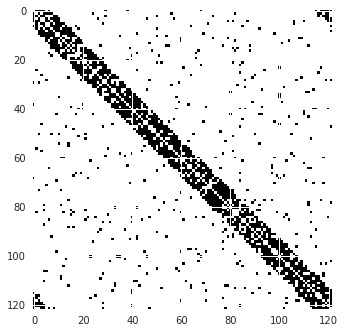

In [5]:
small_world_ring_excit
swm = nx.to_numpy_matrix(small_world_ring_excit)
plt.figure()
plt.show()
plt.imshow(swm)





Another way to think about this is each pixel in the matrix, has a boolean value, 1 indicates the presence of a connection and 0 means absence of a pixel. Coordinates that are row elements in the matrix, act as indexs into output cells, and cooridinates that are column elements index identify input cells. 
Each connection requires a pair of cells, an input cell and an output cell.

* The figure below makes the point that wiring of the hippocampus appears to be non random, and structured, excluding natural variability between individuals. 

* The neurons represented in the figure come from sparsely populated stains, resultant from an incomplete sampling process.

* connections aren't random in the hiippocampus, they are however highly variable and incomprehensible



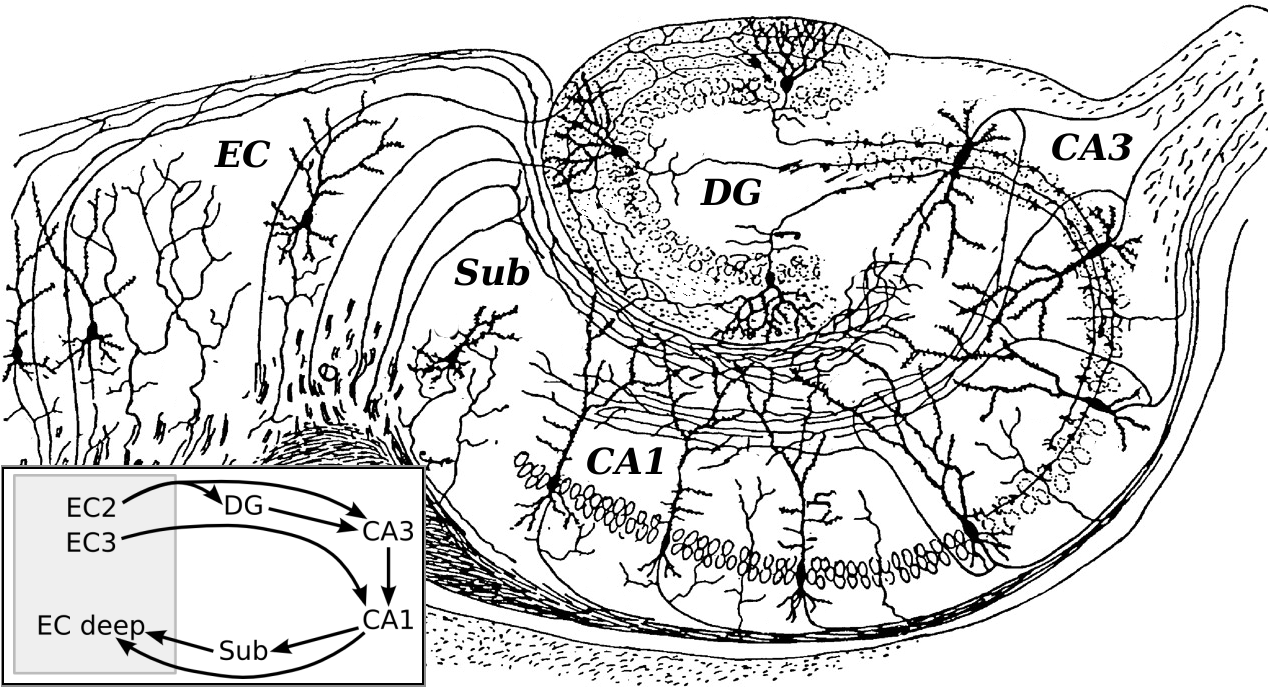

In [6]:
#print(help(Image))
IPython.display.Image("protected_external/CajalHippocampus.png",width=80,height=80,retina=True, )

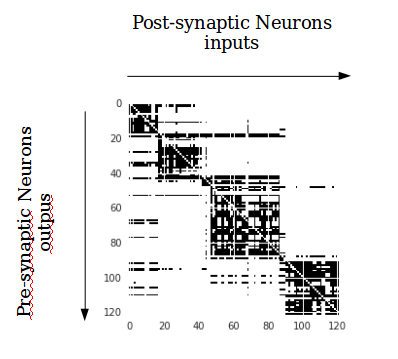

In [7]:
Image("protected_external/Screenshot from 2018-04-14 21-09-26.png")


* The connectivity pattern between a small world network
And the experimentally derived mesoscopic rodent connectome is substantially different. You can see this directly in the plots immediately below. 

And you can see how statistically the distribution of connection densities are substantially different per neuron in the experimental network versus the small world network.

* There exists a small world model of the Hippocampus...
But it is arguably dated, we consulted this existing model during model building and analysis in order to draw comparisons.

* As a reductio Absurdium Russell created a a small-world network, merely for the purpose of drawing a contrast. Dan visualized it using a chord diagram, we now are able to visualize the small world network and conpare with the actual network.
As you can see in the small world network there are many connections to and from neighbouring neurons, but also some connections that span across the whole network.

There are many discrepancies between the small world network and the experimentally derived network as Denise will illustrate. 


Denise's analysis of the network shows how the small world network, is not an ideal approximation of the observed network structure. Compared to the "experimentally observed" rodent hippocampus wiring map. In the experimental connectivity there is a much larger variance in input synapse number and output synapse number per neuron. The realistic wiring map contained many cells with lots of inputs, and outputs, and many cells with few inputs, and outputs, where both number of inputs and number of outputs were assumed to vary independently of each other. Basically the inputs and the outputs spanning the whole networks were distributed substantially differently. And this particular small world network fails to reproduce the observed distribution. Small-world networks assume random long range connectivity and guaranteed neighboring connectivity, but these two assumptions will have a great impact on how the network responds to and modifies information. 

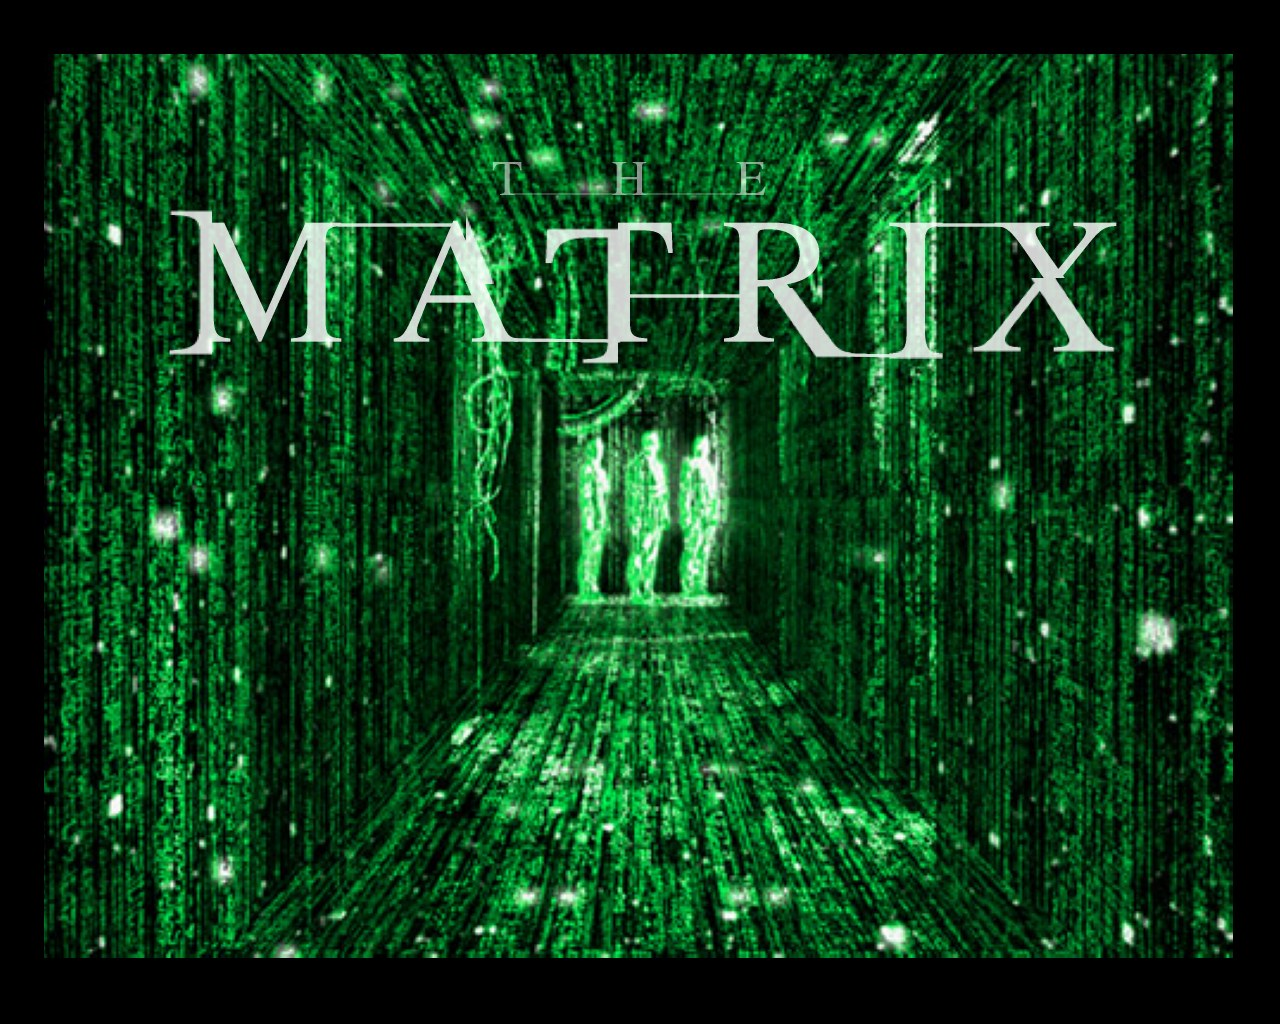

In [8]:
Image("protected_external/thematrix.jpg")


In [9]:



url = "https://drpetty.shinyapps.io/AdjacencyMatrix/"
iframe = '<iframe src=' + url + ' width=900 height=700></iframe>'
IPython.display.HTML(iframe)



In [10]:

url = "https://drpetty.shinyapps.io/NetworkVisualization/"
iframe = '<iframe src=' + url + ' width=900 height=700></iframe>'
IPython.display.HTML(iframe)


# Network Dynamics
## How the network behaves: 
# and how the individual neurons
The structural analysis of the network was interesting, however we were interested in the time varying patterns of electrical 
activity implied by the experimentally derived wiring map, and how the activity of the experimental wiring map differed from 
a previously published small world model.

and the network comprized by behave them behave 
When you 'tickle' neurons with noise.
'Tickle', stimulate with noisy current injection values
with mean value slightly below rheobase, and mean+variance of noise current stim, often well above 
rheobase.

#beyond their queiescent operation region.

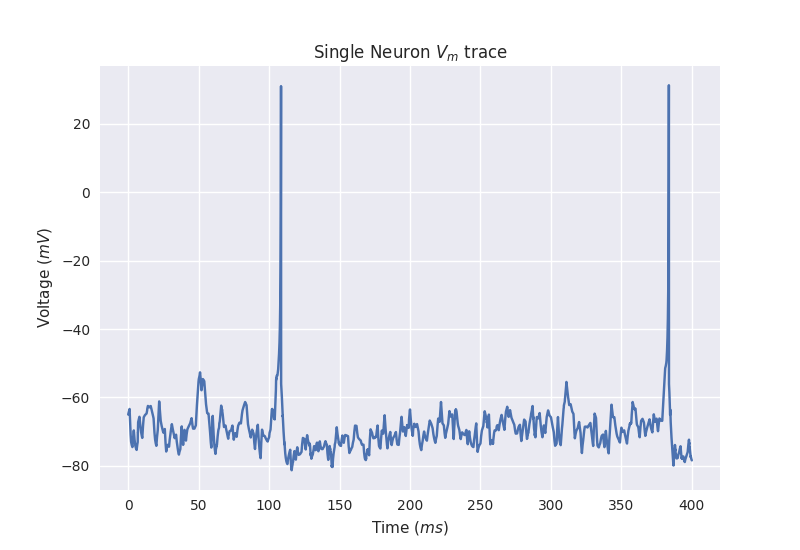

In [11]:
#!pip install natsort
import natsort
import IPython
IPython.display.Image('protected_img/weight_0.05eespecific_analogsignals.png')


Slide 7.5 Matrix guy?

Dan:
But unless you’re this guy, it’s hard to “see patterns in the digital matrix.

Slide 8. Network visualization with R

Dan explains the interactive network visualization.

Slide 9. Single neuron and epsp ipsp graph

Russell explains action potential
In in real neurons and digital models, you can measure the voltage across the cells membrane.

These voltages are recorded and plotted against time. 

There are excitatory and inhibitory connections between neurons. These types of connections either act to increase the voltage of post synaptic cells, or to decrease it, (respectively) making it more or less likely that the post synaptic cell will fire an action potential. The action potential acts as a message from speaking cell to potentially numerous listening cells.




In [ ]:
Slide 10.  Waveform

Tickling the network with noise. Results in the voltages across the neurons. Slider that shows all the voltages across the neurons at different values of synaptic weight.

The default behavior of the modelled network, is a silent state. The network will not do anything, until some of the neurons are stimulated with noisey current injection. The current injection value is continuous waveform with a mean value nominally below the neurons threshold, and a standard deviation that can take the current injection waveform on an above threshold trajectory.

Since very many of these events are happening simultaneously the state of the network is typically very heterogeneous at any time point, with very many possible temporal spatial patterns it can occupy. The following graphs are used to assess the qualitative differences between temporal spatial patterns in the network.





In [ ]:
Slide 11. Raster plots.

Russell explains raster plots.

Slide 12.  Qi Image of the header.

Simpler existing modelling work that explored manipulating net synaptic weight, showed greater network asynchrony, however we did not always find that increasing the synaptic weight lead to greater asynchrony.


This visualisation tool, allows us to make pragmatic decisions about network design.
* prune neurons that don't input connections
There exist neurons with no inputs from the modelled network and their states cannot be influenced by the modelled network, so they are excluded.

Not just a final results analysis, these visualisations are sanity checks of the model, and they help inform model design.

['protected_img/weight_1.0analogsignals.png', 'protected_img/weight_0.025analogsignals.png', 'protected_img/weight_0.5analogsignals.png', 'protected_img/weight_1.5analogsignals.png', 'protected_img/weight_2.0analogsignals.png', 'protected_img/weight_3.0analogsignals.png', 'protected_img/weight_0.4analogsignals.png', 'protected_img/weight_0.0125analogsignals.png', 'protected_img/weight_0.25analogsignals.png', 'protected_img/weight_0.0025analogsignals.png', 'protected_img/weight_0.125analogsignals.png', 'protected_img/weight_2.5analogsignals.png', 'protected_img/weight_0.05analogsignals.png', 'protected_img/weight_0.3analogsignals.png']
['protected_img/weight_0.0025analogsignals.png', 'protected_img/weight_0.0125analogsignals.png', 'protected_img/weight_0.025analogsignals.png', 'protected_img/weight_0.05analogsignals.png', 'protected_img/weight_0.125analogsignals.png', 'protected_img/weight_0.25analogsignals.png', 'protected_img/weight_0.3analogsignals.png', 'protected_img/weight_0.4anal

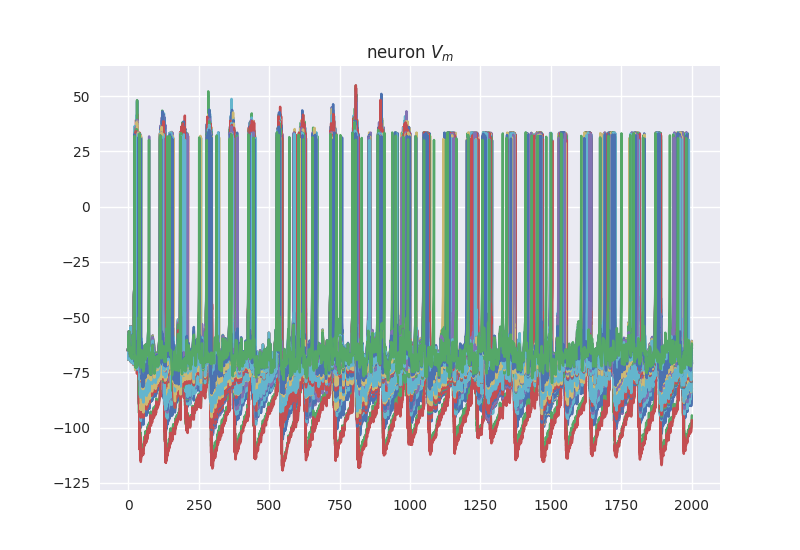

<function __main__.plot_cvs>

In [12]:
!pwd
import glob
toggle_files = glob.glob('protected_img/*weight_*analogsignals*.png')
toggle_files = list(filter(lambda x:'specific' not in x, toggle_files))
toggle_files = list(filter(lambda x:'projections' not in x, toggle_files))
toggle_files = list(filter(lambda x:'inhibitory' not in x, toggle_files))

lenof = len(toggle_files)

def plot_cvs(tf):
    import glob
    toggle_files = glob.glob('protected_img/*weight_*analogsignals*.png')
    toggle_files = list(filter(lambda x:'specific' not in x, toggle_files))
    toggle_files = list(filter(lambda x:'projections' not in x, toggle_files))
    toggle_files = list(filter(lambda x:'inhibitory' not in x, toggle_files))

    print(toggle_files)
    toggle_files = sorted(toggle_files)
    print(toggle_files)
    keyed = { k:v for k,v in enumerate(toggle_files) }
    #wgf = {0:1,1:3,2:9,3:15,4:20,5:30,6:40,7:10}
    #print('slider value was',tf)
    #print('weight value was',wgf[tf])
    display(Image(str(keyed[tf])))

    
interact(plot_cvs, tf = widgets.IntSlider(
    value=0,
    min=0,
    max=lenof-1,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
))

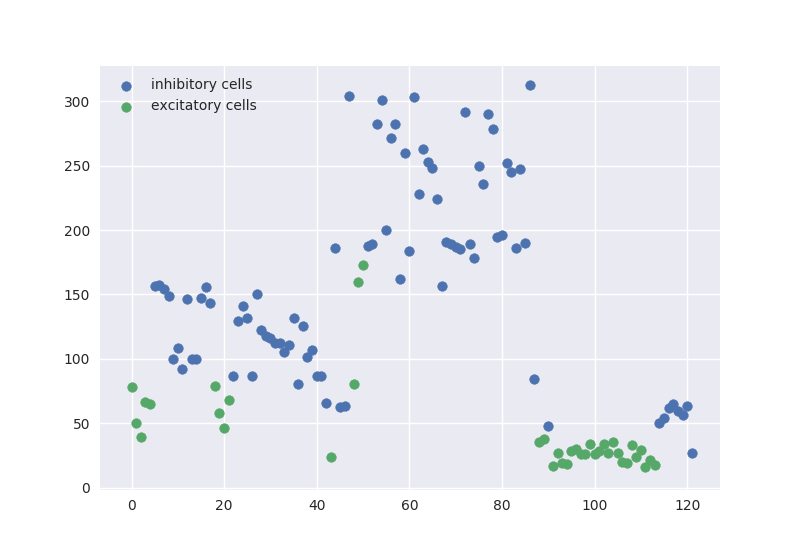

<function __main__.plot_cvs>

In [13]:
import glob
toggle_files = glob.glob('protected_img/*firing_rates_per_cell_*.png')
lenof = len(toggle_files)

def plot_cvs(tf):
    import glob
    toggle_files = glob.glob('protected_img/*firing_rates_per_cell_*.png')
    toggle_files = sorted(toggle_files)

    keyed = { k:v for k,v in enumerate(toggle_files) }
    #wgf = {0:1,1:3,2:9,3:15,4:20}
    #print('slider value was',tf)
    #print('weight value was',wgf[tf])
    display(Image(str(keyed[tf])))

    
interact(plot_cvs, tf = widgets.IntSlider(
    value=0,
    min=0,
    max=lenof-1,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
))

['protected_img/weight_0.0025raster_plot.png', 'protected_img/weight_0.0125raster_plot.png', 'protected_img/weight_0.025raster_plot.png', 'protected_img/weight_0.05raster_plot.png', 'protected_img/weight_0.125raster_plot.png', 'protected_img/weight_0.25raster_plot.png', 'protected_img/weight_0.3raster_plot.png', 'protected_img/weight_0.4raster_plot.png', 'protected_img/weight_0.5raster_plot.png', 'protected_img/weight_1.0raster_plot.png', 'protected_img/weight_1.5raster_plot.png', 'protected_img/weight_2.0raster_plot.png', 'protected_img/weight_2.5raster_plot.png', 'protected_img/weight_3.0raster_plot.png']


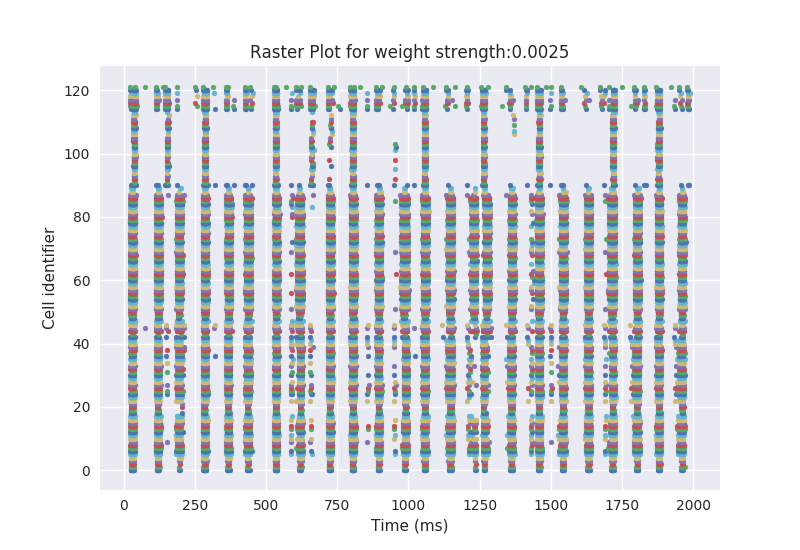

<function __main__.plot_raster>

In [14]:
import numpy as np
import os
#base_dir = os.getcwd() +str('/protected_img')
#try:
#    os.chdir(base_dir)
#except:
#    pass
import glob
toggle_files = glob.glob('protected_img/*raster*.png')
lenof = len(toggle_files)
def plot_raster(tf):
    import glob
    from natsort import natsorted
    toggle_files = glob.glob('protected_img/*raster*.png')
    toggle_files = sorted(toggle_files)
    print(toggle_files)
    keyed = { k:v for k,v in enumerate(toggle_files) }
    #wgf = {0:1,1:3,2:9,3:15,4:20}
    #print('slider value was',tf)
    #print('weight value was',wgf[tf])
    display(Image(str(keyed[tf])))

    
interact(plot_raster, tf = widgets.IntSlider(
    value=0,
    min=0,
    max=lenof-1,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
))

In [ ]:


Dan:
Firing rate as final slide.



url = "https://drpetty.shinyapps.io/NetworkVisualization/"
iframe = '<iframe src=' + url + ' width=900 height=700></iframe>'
IPython.display.HTML(iframe)



# Conclusion
Unlike in real experiments, in simulation we can record from all neurons, all the time. We can manipulate the parameters of each neuron independently and decompose the contributions of single neurons and classes of neurons in a network. It’s almost possible to some of these things, in-vivo, but it would usually involve breeding dedicated rodents, and it’s a very technical and resource intensive enterprise, with the potential for catastrophe.

In summary we created a general purpose network visualization pipeline, on a reproducible Docker base. The visualization pipeline is highly effective, at relating structure to function, in a way that exposes problems in the model. The visualization suite is well suited to prototyping and development of different network models in different brain regions.



In [15]:

'''
* Elements of the matrix are enumerated neurons in the modelled network. 
* Neurons number can then act as index into rows and columns.
* The connection matrix (descending through) row elements, describe pre-synaptic neurons
* Column elements (moving left to right describe) the number of the post synapse, the target of a synaptic connection.
axis_callw = [ i for i in range(0,len(degree_w)) ]
degree_t = [ f[0] for f in stop_exc ]
axis_callt = [ i for i in range(0,len(degree_t)) ]
plt.figure()
plt.title('Betweeness centrality')
plt.scatter(axis_callw[0:20],degree_w[0:20],label='small world');
plt.scatter(axis_callt[0:20],degree_t[0:20],label='excitatory staining reconstruction');
plt.scatter(axis_callt[0:20],degree_i[0:20],label='inhibitory staining reconstruction');

plt.legend(loc="upper right")

plt.figure()
plt.title('Betweeness centrality')
plt.scatter(axis_callw,degree_w,label='small world');
plt.scatter(axis_callt,degree_t,label='excitatory staining reconstruction');
plt.scatter(axis_callt,degree_i,label='inhibitory staining reconstruction');

plt.legend(loc="upper right")
'''

'\naxis_callw = [ i for i in range(0,len(degree_w)) ]\ndegree_t = [ f[0] for f in stop_exc ]\naxis_callt = [ i for i in range(0,len(degree_t)) ]\nplt.figure()\nplt.title(\'Betweeness centrality\')\nplt.scatter(axis_callw[0:20],degree_w[0:20],label=\'small world\');\nplt.scatter(axis_callt[0:20],degree_t[0:20],label=\'excitatory staining reconstruction\');\nplt.scatter(axis_callt[0:20],degree_i[0:20],label=\'inhibitory staining reconstruction\');\n\nplt.legend(loc="upper right")\n\nplt.figure()\nplt.title(\'Betweeness centrality\')\nplt.scatter(axis_callw,degree_w,label=\'small world\');\nplt.scatter(axis_callt,degree_t,label=\'excitatory staining reconstruction\');\nplt.scatter(axis_callt,degree_i,label=\'inhibitory staining reconstruction\');\n\nplt.legend(loc="upper right")\n'

In [16]:
'''
Gexc = nx.DiGraph(exc)
Ginh = nx.DiGraph(inh)
m = nx.DiGraph(m)

receivers = m.in_degree()
transmitters = m.out_degree()

top_r = sorted(([ (v,k) for k, v in dict(receivers).items() ]), reverse=True)
top_t = sorted(([ (v,k) for k, v in dict(transmitters).items() ]), reverse=True)
#print(top_r)
ginh = nx.betweenness_centrality(Ginh)
gexc = nx.betweenness_centrality(Gexc)
top_inh = sorted(([ (v,k) for k, v in dict(ginh).items() ]), reverse=True)
top_exc = sorted(([ (v,k) for k, v in dict(gexc).items() ]), reverse=True)'
'''

"\nGexc = nx.DiGraph(exc)\nGinh = nx.DiGraph(inh)\nm = nx.DiGraph(m)\n\nreceivers = m.in_degree()\ntransmitters = m.out_degree()\n\ntop_r = sorted(([ (v,k) for k, v in dict(receivers).items() ]), reverse=True)\ntop_t = sorted(([ (v,k) for k, v in dict(transmitters).items() ]), reverse=True)\n#print(top_r)\nginh = nx.betweenness_centrality(Ginh)\ngexc = nx.betweenness_centrality(Gexc)\ntop_inh = sorted(([ (v,k) for k, v in dict(ginh).items() ]), reverse=True)\ntop_exc = sorted(([ (v,k) for k, v in dict(gexc).items() ]), reverse=True)'\n"

In [17]:
'''
top10e = top_exc[0:int(len(top_exc)/10)]
top50e = top_exc[0:int(len(top_exc)/2)]
top10i = top_inh[0:int(len(top_inh)/10)]
top50i = top_inh[0:int(len(top_inh)/2)]
'''

'\ntop10e = top_exc[0:int(len(top_exc)/10)]\ntop50e = top_exc[0:int(len(top_exc)/2)]\ntop10i = top_inh[0:int(len(top_inh)/10)]\ntop50i = top_inh[0:int(len(top_inh)/2)]\n'

In [18]:
'''
degree_rec = [ f[0] for f in top_r ]
axis_callr = [ i for i in range(0,len(degree_rec)) ]
degree_t = [ f[0] for f in top_t ]
axis_callt = [ i for i in range(0,len(degree_t)) ]
plt.title('in-degree out-degree')
plt.plot(axis_callr,degree_rec,label='input degree per neuron');
plt.plot(axis_callt,degree_t,label='output degree per neuron');
plt.legend(loc="upper right")
'''

'\ndegree_rec = [ f[0] for f in top_r ]\naxis_callr = [ i for i in range(0,len(degree_rec)) ]\ndegree_t = [ f[0] for f in top_t ]\naxis_callt = [ i for i in range(0,len(degree_t)) ]\nplt.title(\'in-degree out-degree\')\nplt.plot(axis_callr,degree_rec,label=\'input degree per neuron\');\nplt.plot(axis_callt,degree_t,label=\'output degree per neuron\');\nplt.legend(loc="upper right")\n'

In [19]:
'''
degree_c10e = [ f[0] for f in top10e ]
axis_c10e = [ i for i in range(0,len(degree_c10e)) ]
degree_c50e = [ f[0] for f in top50e ]
axis_c50e = [ i for i in range(0,len(degree_c50e)) ]
degree_c10i = [ f[0] for f in top10i ]
axis_c10i = [ i for i in range(0,len(degree_c10i)) ]
degree_c50i = [ f[0] for f in top50i ]
axis_c50i = [ i for i in range(0,len(degree_c50i)) ]
'''

'\ndegree_c10e = [ f[0] for f in top10e ]\naxis_c10e = [ i for i in range(0,len(degree_c10e)) ]\ndegree_c50e = [ f[0] for f in top50e ]\naxis_c50e = [ i for i in range(0,len(degree_c50e)) ]\ndegree_c10i = [ f[0] for f in top10i ]\naxis_c10i = [ i for i in range(0,len(degree_c10i)) ]\ndegree_c50i = [ f[0] for f in top50i ]\naxis_c50i = [ i for i in range(0,len(degree_c50i)) ]\n'

In [20]:
'''
plt.clf()
plt.title('betweenness centrality')
plt.plot(axis_c10e,degree_c10e,label='excitatory syn');
plt.plot(axis_c10i,degree_c10i,label='inhibitory syn');
plt.show()
'''

"\nplt.clf()\nplt.title('betweenness centrality')\nplt.plot(axis_c10e,degree_c10e,label='excitatory syn');\nplt.plot(axis_c10i,degree_c10i,label='inhibitory syn');\nplt.show()\n"

In [21]:
'''
plt.clf()
plt.title('betweenness centrality')
plt.plot(axis_c50i,degree_c50i,label='inhibitory syn');
plt.plot(axis_c50e,degree_c50e,label='excitatory syn');
plt.legend(loc="upper right")

plt.show()
'''


'\nplt.clf()\nplt.title(\'betweenness centrality\')\nplt.plot(axis_c50i,degree_c50i,label=\'inhibitory syn\');\nplt.plot(axis_c50e,degree_c50e,label=\'excitatory syn\');\nplt.legend(loc="upper right")\n\nplt.show()\n'

In [22]:
'''
degree_calle = [ f[0] for f in top_exc ]
axis_calle = [ i for i in range(0,len(top_exc)) ]
degree_calli = [ f[0] for f in top_inh ]
axis_calli = [ i for i in range(0,len(top_inh)) ]
plt.plot(axis_calle,degree_calle,label='excitatory');
plt.plot(axis_calli,degree_calli,label='inhibitory');
plt.legend(loc="upper right")
'''

'\ndegree_calle = [ f[0] for f in top_exc ]\naxis_calle = [ i for i in range(0,len(top_exc)) ]\ndegree_calli = [ f[0] for f in top_inh ]\naxis_calli = [ i for i in range(0,len(top_inh)) ]\nplt.plot(axis_calle,degree_calle,label=\'excitatory\');\nplt.plot(axis_calli,degree_calli,label=\'inhibitory\');\nplt.legend(loc="upper right")\n'

In [23]:

'''
def plot_cvs(tf):
    import glob
    toggle_files = glob.glob('*cvs_mean*.png')
    toggle_files = toggle_files[::-1]

    keyed = { k:v for k,v in enumerate(toggle_files) }
    wgf = {0:1,1:3,2:9,3:15,4:20}
    print('slider value was',tf)
    print('weight value was',wgf[tf])
    display(Image(str(keyed[tf])))

    
interact(plot_cvs, tf = widgets.IntSlider(
    value=0,
    min=0,
    max=4,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
))

'''

"\ndef plot_cvs(tf):\n    import glob\n    toggle_files = glob.glob('*cvs_mean*.png')\n    toggle_files = toggle_files[::-1]\n\n    keyed = { k:v for k,v in enumerate(toggle_files) }\n    wgf = {0:1,1:3,2:9,3:15,4:20}\n    print('slider value was',tf)\n    print('weight value was',wgf[tf])\n    display(Image(str(keyed[tf])))\n\n    \ninteract(plot_cvs, tf = widgets.IntSlider(\n    value=0,\n    min=0,\n    max=4,\n    step=1,\n    description='Test:',\n    disabled=False,\n    continuous_update=False,\n    orientation='horizontal',\n    readout=True,\n    readout_format='d'\n))\n\n"

In [24]:

'''
def plot_cvs(tf):
    import glob
    toggle_files = glob.glob('*multivariate_PSTH*.png')
    toggle_files = toggle_files[::-1]
    print(toggle_files)

    keyed = { k:v for k,v in enumerate(toggle_files) }
    wgf = {0:1,1:3,2:9,3:15,4:20}
    print('slider value was',tf)
    print('weight value was',wgf[tf])
    display(Image(str(keyed[tf])))

    
interact(plot_cvs, tf = widgets.IntSlider(
    value=0,
    min=0,
    max=4,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
))
'''

"\ndef plot_cvs(tf):\n    import glob\n    toggle_files = glob.glob('*multivariate_PSTH*.png')\n    toggle_files = toggle_files[::-1]\n    print(toggle_files)\n\n    keyed = { k:v for k,v in enumerate(toggle_files) }\n    wgf = {0:1,1:3,2:9,3:15,4:20}\n    print('slider value was',tf)\n    print('weight value was',wgf[tf])\n    display(Image(str(keyed[tf])))\n\n    \ninteract(plot_cvs, tf = widgets.IntSlider(\n    value=0,\n    min=0,\n    max=4,\n    step=1,\n    description='Test:',\n    disabled=False,\n    continuous_update=False,\n    orientation='horizontal',\n    readout=True,\n    readout_format='d'\n))\n"

In [25]:
'''

def plot_cvs(tf):
    import glob
    toggle_files = glob.glob('*spike_distance_matrix*.png')
    toggle_files = toggle_files[::-1]

    keyed = { k:v for k,v in enumerate(toggle_files) }
    wgf = {0:1,1:3,2:9,3:15,4:20}
    print('slider value was',tf)
    print('weight value was',wgf[tf])
    display(Image(str(keyed[tf])))

    
interact(plot_cvs, tf = widgets.IntSlider(
    value=0,
    min=0,
    max=4,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
))
'''

"\n\ndef plot_cvs(tf):\n    import glob\n    toggle_files = glob.glob('*spike_distance_matrix*.png')\n    toggle_files = toggle_files[::-1]\n\n    keyed = { k:v for k,v in enumerate(toggle_files) }\n    wgf = {0:1,1:3,2:9,3:15,4:20}\n    print('slider value was',tf)\n    print('weight value was',wgf[tf])\n    display(Image(str(keyed[tf])))\n\n    \ninteract(plot_cvs, tf = widgets.IntSlider(\n    value=0,\n    min=0,\n    max=4,\n    step=1,\n    description='Test:',\n    disabled=False,\n    continuous_update=False,\n    orientation='horizontal',\n    readout=True,\n    readout_format='d'\n))\n"

In [26]:

'''
def plot_cvs(tf):
    import glob
    toggle_files = glob.glob('*cluster_spike_distance*.png')
    toggle_files = toggle_files[::-1]

    keyed = { k:v for k,v in enumerate(toggle_files) }
    wgf = {0:1,1:3,2:9,3:15,4:20}
    print('slider value was',tf)
    print('weight value was',wgf[tf])
    display(Image(str(keyed[tf])))

    
interact(plot_cvs, tf = widgets.IntSlider(
    value=0,
    min=0,
    max=4,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
))
'''

"\ndef plot_cvs(tf):\n    import glob\n    toggle_files = glob.glob('*cluster_spike_distance*.png')\n    toggle_files = toggle_files[::-1]\n\n    keyed = { k:v for k,v in enumerate(toggle_files) }\n    wgf = {0:1,1:3,2:9,3:15,4:20}\n    print('slider value was',tf)\n    print('weight value was',wgf[tf])\n    display(Image(str(keyed[tf])))\n\n    \ninteract(plot_cvs, tf = widgets.IntSlider(\n    value=0,\n    min=0,\n    max=4,\n    step=1,\n    description='Test:',\n    disabled=False,\n    continuous_update=False,\n    orientation='horizontal',\n    readout=True,\n    readout_format='d'\n))\n"

https://en.wikipedia.org/wiki/Subiculum
The subiculum is the main output of the hippocampus
It receives input from CA1 and entorhinal cortical layer III pyramidal neurons and is the main output of the hippocampus. The pyramidal neurons send projections to the nucleus accumbens, septal nuclei, prefrontal cortex, lateral hypothalamus, nucleus reuniens, mammillary nuclei, entorhinal cortex and amygdala.
The pyramidal neurons in the subiculum exhibit transitions between two modes of action potential output: bursting and single spiking.[2] The transitions between these two modes is thought to be important for routing information out of the hippocampus.

In the brain, the perforant path or perforant pathway, provides a connectional route from the entorhinal cortex[1] to all fields of the hippocampal formation, including the dentate gyrus, all CA fields (including CA1),[2] and the subiculum.
Though it arises mainly from entorhinal layers II and III, the perforant path comprises a smaller component that originates in deep layers V and VI. There is a major dichotomy with respect to the laminar origin and related terminal distribution: neurons in layer II (and possibly layer VI) project to the dentate gyrus and CA3, whereas layer III (and possibly layer V) cells project to CA1 and the subiculum via the temporoammonic pathway.[1]

The CA3, is a pacemaker of encoding and retrieving waveform subcycles, of the Gamma frequency.

The region is conventionally divided into three divisions. CA3a is the part of the cell band that is most distant from the dentate (and closest to CA1). CA3b is the middle part of the band nearest to the fimbria and fornix connection. CA3c is nearest to the dentate, inserting into the hilus. CA3 overall, has been considered to be the “pacemaker” of the hippocampus. Much of the synchronous bursting activity associated with interictal epileptiform activity appears to be generated in CA3. Its excitatory collateral connectivity seems to be mostly responsible for this. CA3 uniquely, has pyramidal cell axon collaterals that ramify extensively with local regions and make excitatory contacts with them. CA3 has been implicated in a number of working theories on memory and hippocampal learning processes. Slow oscillatory rhythms (theta-band; 3–8 Hz) are cholinergically driven patterns that depend on coupling of interneurons and pyramidal cell axons via gap junctions, as well as glutaminergic (excitatory) and GABAergic (inhibitory) synapses. Sharp EEG waves seen here are also implicated in memory consolidation.[1]


# Rich club
The rich club coefficient is a real number between 0 and 1, that indicates how interconnected the highest between central hubs are.

Are the most popular people friends with each other? It's conceivable that they are not.

